In [1]:
## http://dataaspirant.com/2017/01/25/svm-classifier-implemenation-python-scikit-learn/
%matplotlib inline
from sklearn import datasets
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [2]:
iris_dataset = datasets.load_iris()
iris_dataset['DESCR']

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [3]:
iris_dataset['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

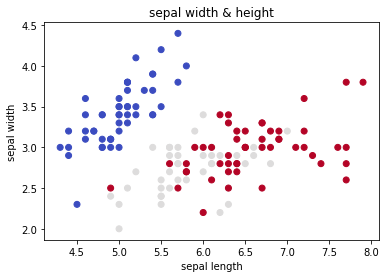

In [7]:
def sepal_visulization_data(iris):
    X = iris.data[:,:2]
    y = iris.target
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.title('sepal width & height')
    plt.show()
    
sepal_visulization_data(iris_dataset)

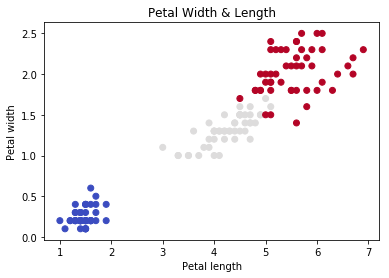

In [8]:
def visuvalize_petal_data(iris):
	X = iris.data[:, 2:]  # we only take the last two features.
	y = iris.target
	plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
	plt.xlabel('Petal length')
	plt.ylabel('Petal width')
	plt.title('Petal Width & Length')
	plt.show()
 
visuvalize_petal_data(iris_dataset)

In [9]:
X = iris_dataset.data[:, :2]  # we only take the Sepal two features.
y = iris_dataset.target
C = 1  # SVM regularization parameter (degree of importance that is given to miss-classifications)
 
# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C).fit(X, y)
# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)


0.0
7.9
-0.9
3.5
[[0.   0.02 0.04 ... 7.84 7.86 7.88]
 [0.   0.02 0.04 ... 7.84 7.86 7.88]
 [0.   0.02 0.04 ... 7.84 7.86 7.88]
 ...
 [0.   0.02 0.04 ... 7.84 7.86 7.88]
 [0.   0.02 0.04 ... 7.84 7.86 7.88]
 [0.   0.02 0.04 ... 7.84 7.86 7.88]]
[[-0.9  -0.9  -0.9  ... -0.9  -0.9  -0.9 ]
 [-0.88 -0.88 -0.88 ... -0.88 -0.88 -0.88]
 [-0.86 -0.86 -0.86 ... -0.86 -0.86 -0.86]
 ...
 [ 3.44  3.44  3.44 ...  3.44  3.44  3.44]
 [ 3.46  3.46  3.46 ...  3.46  3.46  3.46]
 [ 3.48  3.48  3.48 ...  3.48  3.48  3.48]]
[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


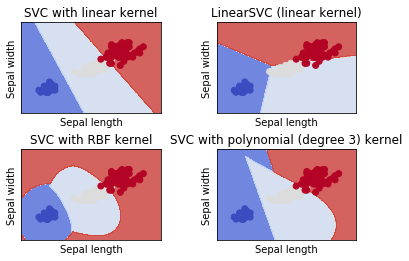

In [26]:
# Visulization of the model

h = .02  # step size in the mesh
 
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

print(x_min); print(x_max)
print(y_min); print(y_max)
print(xx); print(yy)

# title for the plots
titles = ['SVC with linear kernel',
	   'LinearSVC (linear kernel)',
	    'SVC with RBF kernel',
	    'SVC with polynomial (degree 3) kernel']
 
 
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
	# Plot the decision boundary. For that, we will assign a color to each
	# point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    
    # ravel funtion return the original array not copy
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    print(Z)
    plt.contourf(xx, yy,   Z,cmap=plt.cm.coolwarm, alpha=0.8)
#   It take 2d represtatiion of 3d one like bowl in ellipse
 
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
 
plt.show()


In [17]:
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the last two features.
y = iris.target
C = 1.0  # SVM regularization parameter
 
# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C).fit(X, y)
# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

0.0
7.9
-0.9
3.5
[[0.   0.02 0.04 ... 7.84 7.86 7.88]
 [0.   0.02 0.04 ... 7.84 7.86 7.88]
 [0.   0.02 0.04 ... 7.84 7.86 7.88]
 ...
 [0.   0.02 0.04 ... 7.84 7.86 7.88]
 [0.   0.02 0.04 ... 7.84 7.86 7.88]
 [0.   0.02 0.04 ... 7.84 7.86 7.88]]
[[-0.9  -0.9  -0.9  ... -0.9  -0.9  -0.9 ]
 [-0.88 -0.88 -0.88 ... -0.88 -0.88 -0.88]
 [-0.86 -0.86 -0.86 ... -0.86 -0.86 -0.86]
 ...
 [ 3.44  3.44  3.44 ...  3.44  3.44  3.44]
 [ 3.46  3.46  3.46 ...  3.46  3.46  3.46]
 [ 3.48  3.48  3.48 ...  3.48  3.48  3.48]]
[0 0 0 ... 2 2 2]
[0 0 0 ... 2 2 2]
[2 2 2 ... 2 2 2]
[0 0 0 ... 2 2 2]


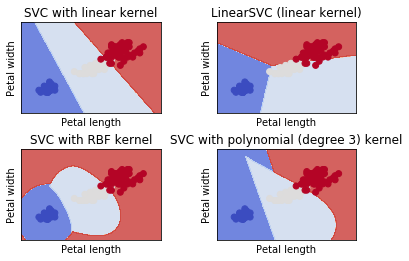

In [12]:
h = .02 # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
	            np.arange(y_min, y_max, h))

print(x_min); print(x_max)
print(y_min); print(y_max)

print(xx); print(yy)

# title for the plots
titles = ['SVC with linear kernel',
	  'LinearSVC (linear kernel)',
	  'SVC with RBF kernel',
	  'SVC with polynomial (degree 3) kernel']
 
 
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print(Z)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
 
plt.show()

In [13]:
# IMPLEMENTIG PCA TO OUR DATA SET
iris = datasets.load_iris()
X = iris.data[:]
y =iris.target

x = StandardScaler().fit_transform(X)

# print(x.size)
# print(y.size)

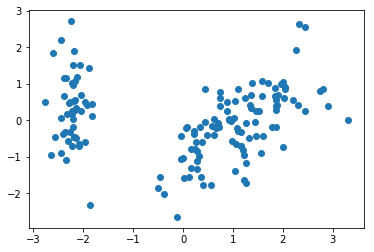

In [14]:
pca = PCA(n_components=2)

tod_matrix = pca.fit_transform(x)
# print(tod_matrix)

colors = ['r','g','b']
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
a = [0,1,2]

# print(x.size); print(y.size)
p = []
q = []

for i in tod_matrix:
    p.append(i[0])
    q.append(i[1])
    

plt.scatter(p,q)
    
# print(p)
# print(q)

